#MNIST Handwritten Digits Classification with Keras.
The classification is done with help of dense neural networks. The outline of the neural network is :
Input(784) -> Relu Activation -> Layer1(128) ->Relu Activation -> Layer2(128) -> Softmax Activation -> Output Layer(10).

I got validation accuracy of ~96% in this run. Will try to add Dropout next to improve the validation accuracy.



Data Preprocessing and creating the neural network.

In [1]:


from keras.datasets import mnist
from keras.layers import Dense, add, Dropout, Activation
from keras.models import Sequential 
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = mnist.load_data()



print("X_train data shape is {}".format(X_train.shape))
print("y_train data shape is {}".format(y_train.shape))
print("X_test data shape is {}".format(X_test.shape))
print("y_test data shape is {}".format(y_test.shape))



X_train_nn = X_train[:55000, :, :]
y_train_nn = y_train[:55000]
X_validation_nn = X_train[55000:, :, :]
y_validation_nn = y_train[55000:]


print("X_validation data shape is {}".format(X_validation_nn.shape))
print("y_validation data shape is {}".format(y_validation_nn.shape))



#plt.imshow(X_train[0,...])
#plt.xlabel("The label is {}".format(y_train[0,...]))
#plt.show()




X_train_nn_1 = X_train_nn.reshape(X_train_nn.shape[0], -1)
X_validation_nn_1 = X_validation_nn.reshape(X_validation_nn.shape[0], -1)
y_train_nn_1 = tf.one_hot(y_train_nn, 10)
y_validation_nn_1 = tf.one_hot(y_validation_nn, 10)

X_train_final = X_train_nn_1 / 255.0
X_validation_final = X_validation_nn_1 / 255.0

print("Shapes for modelling are: ")
print("X_train_final {}".format(X_train_final.shape))
print("X_validation_final {}".format(X_validation_final.shape))
print("y_train_nn_1 {}".format(y_train_nn_1.shape))
print("y_validation_nn_1 {}".format(y_validation_nn_1.shape))


lr = 0.01
n_inputs = 784
n_layer1 = 128
n_layer2 = 128
n_outputs = 10
minibatch_size = 32



model = Sequential()
model.add(Dense(n_layer1, input_dim = n_inputs))

model.add(Activation('relu'))
model.add(Dense(n_layer2))
model.add(Activation('relu'))
model.add(Dense(n_outputs))
model.add(Activation('softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = X_train_final, y = y_train_nn_1, epochs = 10, verbose = 1, steps_per_epoch = 10, validation_data = (X_validation_final, y_validation_nn_1), validation_steps = 10)
score = model.evaluate(x = X_validation_final, y = y_validation_nn_1, steps=10)
print("Metrics at the end are: {0}:  {1} ".format(model.metrics_names, score))




Using TensorFlow backend.


X_train data shape is (60000, 28, 28)
y_train data shape is (60000,)
X_test data shape is (10000, 28, 28)
y_test data shape is (10000,)
X_validation data shape is (5000, 28, 28)
y_validation data shape is (5000,)
Shapes for modelling are: 
X_train_final (55000, 784)
X_validation_final (5000, 784)
y_train_nn_1 (55000, 10)
y_validation_nn_1 (5000, 10)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
10/10 [==============================] - 9s 882ms/step - loss: 1.8748 - acc: 0.4734 - val_loss: 1.2232 - val_acc: 0.7828
Epoch 2/10
10/10 [==============================] - 8s 812ms/step - loss: 0.9009 - acc: 0.8003 - val_loss: 0.4954 - val_acc: 0.8804
Epoch 3/10
10/10 [==============================] - 8s 815ms/step - loss: 0.4809 - acc: 0.8652 - val_loss: 0.3146 - val_acc: 0.9136
Epoch 4/10
10/10 [==============================] - 8s 810ms/step - loss: 0.3602 - 

Let's test this model with some local files.

In [2]:
!pip install pillow


In [0]:
from PIL import Image

In [0]:
from google.colab import files

In [5]:
files.upload()

{}

In [0]:
img = Image.open(str(3) + ".png").convert("L")

In [0]:
img = img.resize((28, 28))

In [0]:
img_arr = np.array(img)

In [9]:
img_arr

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [25

Converting this data into the format of training data and validation data,

In [0]:
img_arr_f = img_arr.flatten()

In [11]:
img_arr_f.shape

(784,)

In [0]:
img_arr_f = 255 - img_arr_f

In [0]:
img_arr_f = img_arr_f / 255.0

In [14]:
img_arr_f

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
img_arr_f_1 = img_arr_f[np.newaxis, :]

In [16]:
img_arr_f_1.shape

(1, 784)

Now, the sample test data is exactly in the format of training and validation data.

In [17]:
img_arr_f_1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [0]:
pred = model.predict(img_arr_f_1)

Probabilities of each label is obtained through the keras model.predict() method.

In [19]:
pred

array([[3.0819941e-05, 4.8952713e-03, 6.3926671e-03, 9.6234983e-01,
        8.5217507e-05, 4.1593262e-03, 7.3483775e-06, 1.4020079e-02,
        6.5623834e-03, 1.4971289e-03]], dtype=float32)

In [0]:
y_pred = np.argmax(pred)


In [21]:
y_pred

3

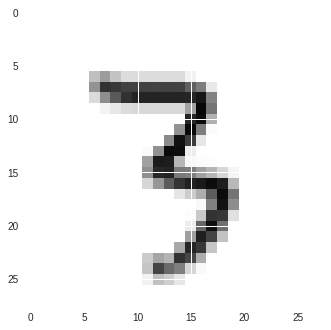

In [22]:
plt.imshow(img)

The image matches with the predicted label!

Trying with some other image,

In [23]:
files.upload()

{}

In [25]:
img = Image.open(str(6) + ".png").convert("L")
img = img.resize((28, 28))
img_arr = np.array(img)
img_arr = img_arr.flatten()
img_arr = img_arr[np.newaxis, :]
img_arr = (255.0 - img_arr) / 255.0
img_arr

array([[0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [26]:
y_pred = model.predict(img_arr)
y_pred

array([[3.4261312e-04, 2.1846967e-05, 1.0790731e-03, 3.3636643e-05,
        9.1237278e-04, 7.1981607e-04, 9.9548572e-01, 2.1603328e-06,
        1.2360170e-03, 1.6682093e-04]], dtype=float32)

In [27]:
np.argmax(y_pred)

6

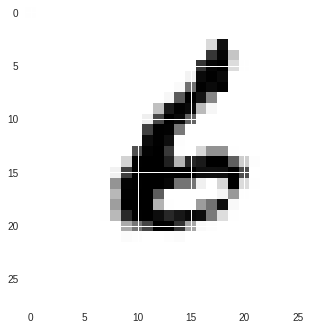

In [28]:
plt.imshow(img)

The image matches with the predicted value again!

In [0]:
predictions = model.predict(X_train_final)

In [30]:
predictions.shape

(55000, 10)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
labels_predicted = []
for i in range(X_train_final.shape[0]):
  labels_predicted.append(np.argmax(predictions[i, :]))
c_mat = confusion_matrix(y_train_nn, labels_predicted)  


In [33]:
c_mat

array([[5295,    1,   10,    8,   10,   16,   36,    6,   42,   10],
       [   1, 6079,   36,   17,   10,    6,    1,   13,   36,   13],
       [  25,   31, 5153,   51,   55,    6,   23,   57,   58,    6],
       [  11,   21,   87, 5236,    4,  100,   11,   37,   78,   37],
       [   8,   24,   30,    2, 5067,    4,   39,    9,   22,  138],
       [  35,    9,    7,   81,   30, 4676,   46,    8,   46,   25],
       [  34,   13,   12,    2,   29,   49, 5280,    1,   16,    0],
       [  11,   26,   51,    9,   35,    5,    1, 5474,    5,   85],
       [  24,   65,   21,   97,   22,   57,   29,    9, 4979,   54],
       [  24,   23,    4,   58,  129,   20,    2,  101,   31, 5074]])

Plotting the confusion matrix.

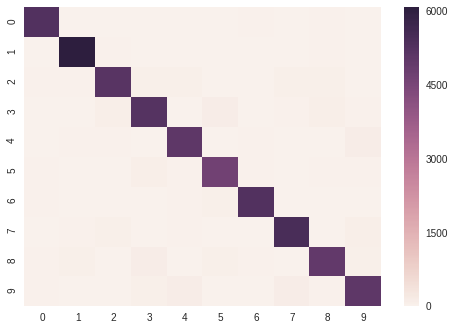

In [34]:
import seaborn as sns
sns.heatmap(c_mat)